In [1]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [2]:
# 加载数据集
boston=load_boston()

In [8]:
# 使用交叉验证
def cross():
    regressor=RandomForestRegressor(n_estimators=100,random_state=25)
    score=cross_val_score(regressor,boston.data,boston.target
                        ,cv=10
                         ,scoring="neg_mean_squared_error" #使用负的均方误差
                         )
    return score
cross()

array([-10.52766814,  -5.05522508,  -5.21109451, -22.5319129 ,
       -10.87964367, -19.6750072 ,  -7.49471448, -95.51846576,
       -28.58388184, -14.2527027 ])

In [12]:
import sklearn
# 打印评价指标
from sklearn import metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [15]:
# 随机森林重要应用之一填补缺失值
# 可以是sklean中的impute模块中的SimpleImuter来填充各种值
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer #填补缺失值

dataset=load_boston()


In [19]:
dataset.data.shape

(506, 13)

In [20]:
# 获取特征数据和标签
x_full,y_full=dataset.data,dataset.target

In [21]:
# 获取样本数和特征数量
n_samples=x_full.shape[0]
n_features=x_full.shape[1]

In [50]:
# 创建缺失数值的数据集
rgn=np.random.RandomState(0)
missing_rate=0.5
n_missing_sample=int(np.floor(n_samples*n_features*missing_rate))
n_missing_sample

missing_features=rgn.randint(0,n_features,n_missing_sample)
missing_samples=rgn.randint(0,n_samples,n_missing_sample)

# missing_samples=rgn.randchoice(n_samples.n_missing_sample,replace=True)

x_missing=x_full.copy()
y_missing=y_full.copy()

# 使用空值进行填充
x_missing[missing_samples,missing_features]=np.nan
x_missing=pd.DataFrame(x_missing)
# x_missing.info()

#print(x_missing.isnull().sum())

from sklearn.impute import SimpleImputer #填补缺失值
# 使用均值填充
imp_mean=SimpleImputer(missing_values=np.nan,strategy="mean")
X_missing_mean=imp_mean.fit_transform(x_missing) #训练fit加导出
X_missing_mean=pd.DataFrame(X_missing_mean)
X_missing_mean.isnull().sum()

# 使用0进行填充
imp_0=SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
X_missing_0=imp_0.fit_transform(x_missing)
X_missing_0=pd.DataFrame(X_missing_0)
X_missing_0.isnull().sum()
X_missing_0.shape

(506, 13)

In [99]:
# 使用随机森林进行填充
# 从缺失值最少的特征列开始填充
# 使用不缺失的数据集做训练集
# 使用有缺失值的数据集做测试集进行填充

x_missing_reg=x_missing.copy()
# 找出数据集中，缺失值从小到大排序的特征的顺序的索引
sortindex=np.argsort(x_missing_reg.isnull().sum(axis=0)).values
x_missing_reg.isnull().sum(axis=0)
# srgsort会返回排序结果的索引
sortindex

x_missing_reg.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


In [100]:
for i in sortindex:
    # 构建新特征和新标签
    df=x_missing_reg
    fillc=df.iloc[:,i]
    df=pd.concat([df[df!=fillc],pd.DataFrame(y_full)])
    
    # 在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0=SimpleImputer(missing_values=np.nan
                       ,strategy="constant"
                       ,fill_value=0).fit_transform(df)
    
    # 找出训练集和测试集
    y_train=fillc[fillc.notnull()]
    # 方便获取空值的索引（需要填充的值）
    y_test=fillc[fillc.isnull()]
    x_train=df_0[y_train.index,:]
    x_test=df_0[y_test.index,:]
    
    # 用随机森林回归来填补缺失值
    rfc=RandomForestRegressor(n_estimators=100)
    rfc=rfc.fit(x_train,y_train)
    y_predict=rfc.predict(x_test)
    
    # 进行填充
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i]=y_predict
x_missing_reg.head()

d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on D

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012568,18.0,5.3236,0.0,0.53800,5.44175,65.200,4.090000,1.0,296.00,14.682,10.1398,4.9800
1,0.027310,0.0,5.3216,0.0,0.46900,5.05042,78.900,4.967100,2.0,306.11,14.859,396.9000,9.1400
2,0.027290,0.0,7.0700,0.0,0.39393,7.18500,61.100,3.914202,2.0,242.00,13.895,8.6959,11.5665
3,0.012813,0.0,5.1876,0.0,0.45800,5.28618,45.800,3.912302,5.0,222.00,18.700,9.4530,11.5510
4,0.013288,0.0,2.1800,0.0,0.39501,7.14700,28.558,3.915854,5.0,302.56,18.700,8.2887,5.3300


In [101]:
# 比较四种填充值得得分
X=[x_full,X_missing_mean,X_missing_0,x_missing_reg]
mse=[]
for x in X:
    estimator=RandomForestRegressor(n_estimators=100)
    scores=cross_val_score(estimator,x,y_full,cv=5,scoring="neg_mean_squared_error").mean()
    mse.append(scores*-1)
    
[*zip(["x_full","X_missing_mean","X_missing_0","x_missing_reg"],mse)]

[('x_full', 22.1237386957484),
 ('X_missing_mean', 41.53768789219568),
 ('X_missing_0', 48.00304442880993),
 ('x_missing_reg', 44.494880144185586)]

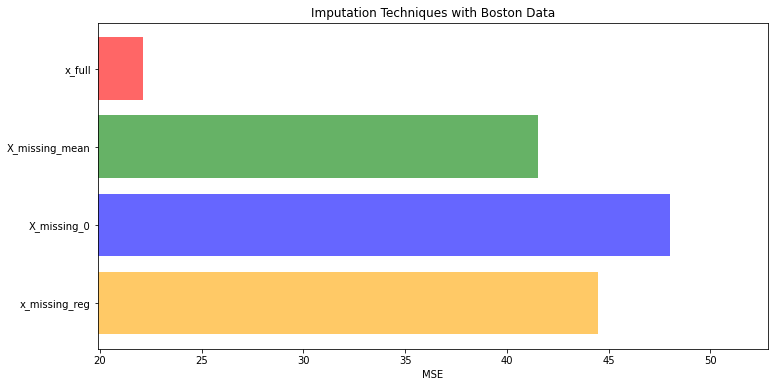

In [103]:
def showPlot():
    x_labels=["x_full","X_missing_mean","X_missing_0","x_missing_reg"]
    colors=["r","g","b","orange"]
    plt.figure(figsize=(12,6))
    ax=plt.subplot(111)
    for i in np.arange(len(mse)):
        ax.barh(i,mse[i],color=colors[i],alpha=0.6,align="center")
    ax.set_title("Imputation Techniques with Boston Data")
    ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
    # 设定刻度
    ax.set_yticks(np.arange(len(mse)))
    ax.set_xlabel("MSE")
    
    ax.invert_yaxis()
    ax.set_yticklabels(x_labels)
    plt.show()
    
showPlot()

### 模型调参得基本思想
### 衡量指标：泛化误差（与模型复杂度相关）
### 调参数之前：先确定（欠拟合还是过拟合）
### 模型太简单（会导致欠拟合）或者太复杂（会导致过拟合）都会导致泛化误差高
### 欠拟合：模型在训练集上和测试集上得分都差
### 过拟合：模型在训练集上得分高，在测试集上得分差

##### 随机森林中
##### n_eatimators :提升平稳，不影响单个模型的复杂度
##### max_depth :有增有减，默认最高深度
##### min_samples_leaf :有增有减，
##### min_samples_split :有增有减，
##### max_festures :有增有减，
##### criterion :有增有减，一般使用gini